In [ ]:
# for csv file download https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download  

In [21]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [23]:
# Load the dataset (ensure creditcard.csv is in the same directory)
df = pd.read_csv('creditcard.csv')

# Downsample to ~10,000 rows while preserving class balance
df_sampled = df.groupby('Class', group_keys=False).apply(
    lambda x: x.sample(int(np.rint(10000 * len(x) / len(df))), random_state=42)
)

# Use the sampled dataset
df = df_sampled.copy()

# Show class distribution
print("Sampled Class Distribution:\n", df['Class'].value_counts())

Sampled Class Distribution:
 Class
0    9983
1      17
Name: count, dtype: int64


C:\Users\Lacuesta\AppData\Local\Temp\ipykernel_18324\1066474263.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby('Class', group_keys=False).apply(


In [24]:
# Normalize the 'Amount' feature
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Drop the 'Time' column
df.drop(['Time'], axis=1, inplace=True)

# Split into features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Create train-test split with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [25]:
# Train a Random Forest model with fewer trees for speed
rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Print classification metrics
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred))

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2995
           1       1.00      0.40      0.57         5

    accuracy                           1.00      3000
   macro avg       1.00      0.70      0.79      3000
weighted avg       1.00      1.00      1.00      3000



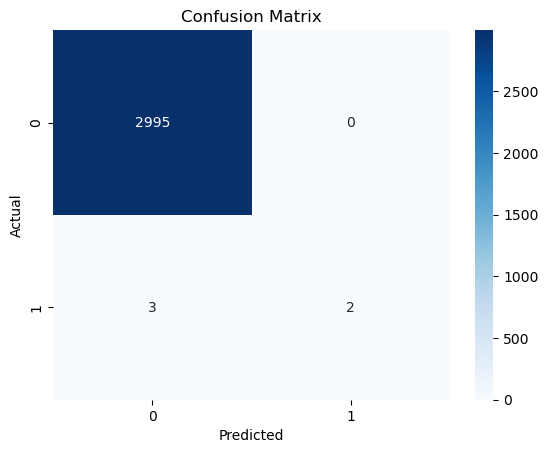

In [27]:
# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

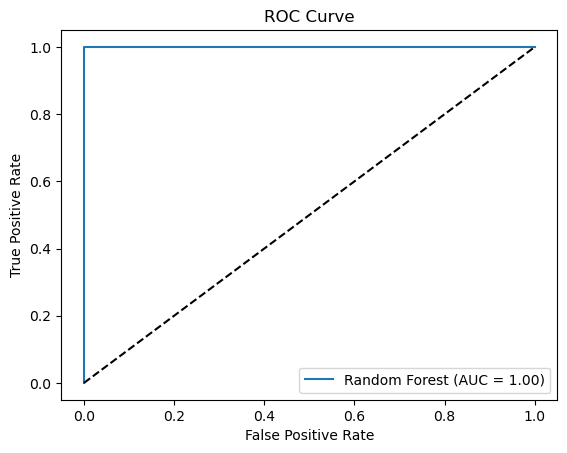

In [31]:
# Calculate ROC curve and AUC score
y_prob = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()